In [434]:
import pandas as pd
import numpy as np

In [435]:
df_1=pd.read_csv('Housing.csv')
df_1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


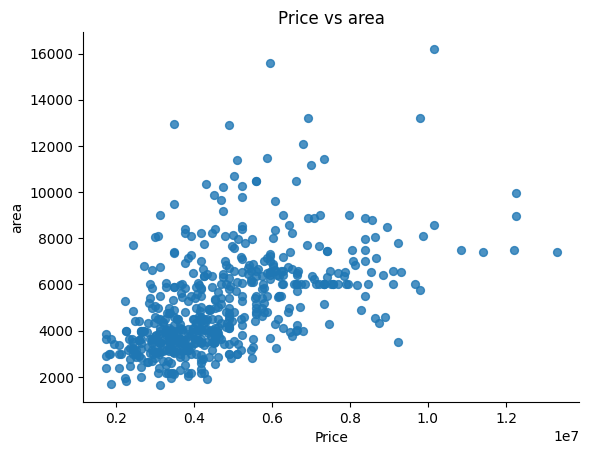

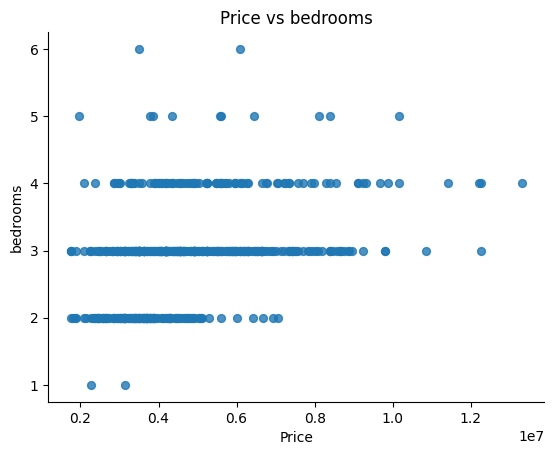

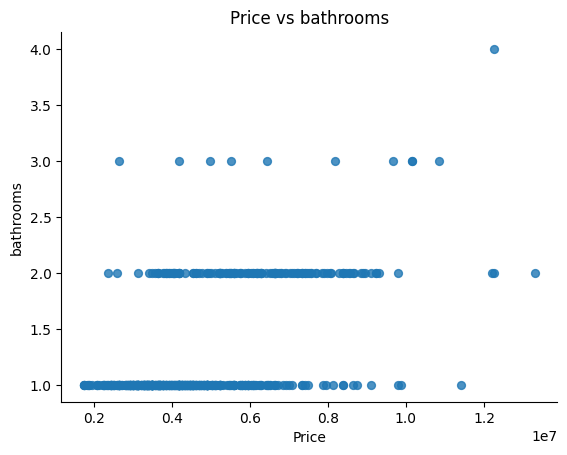

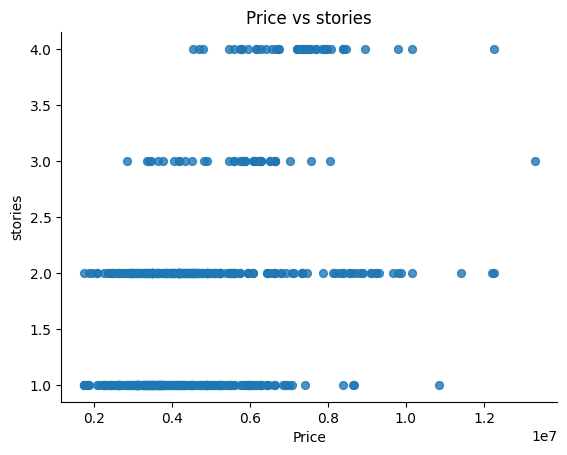

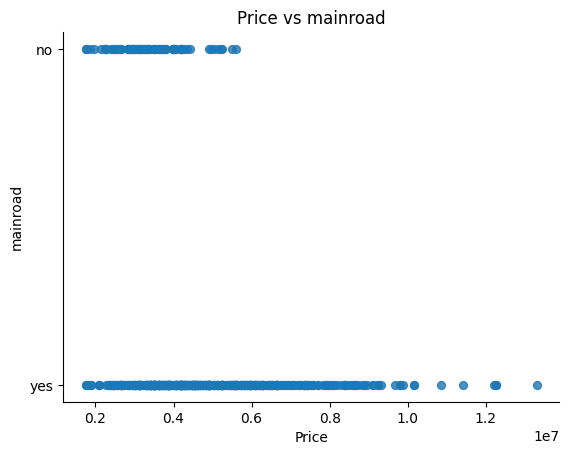

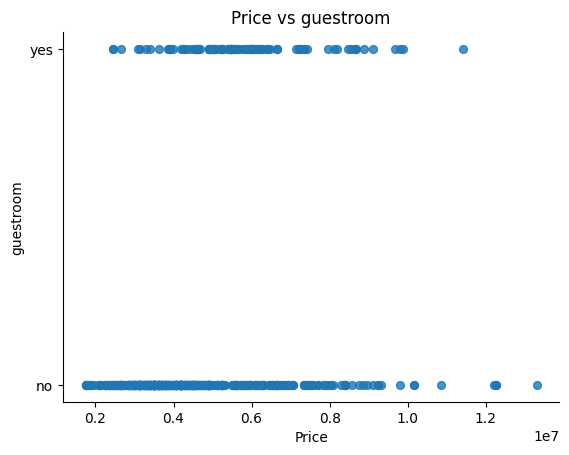

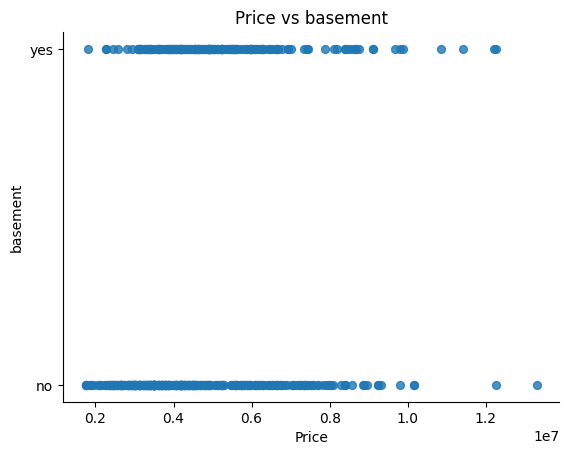

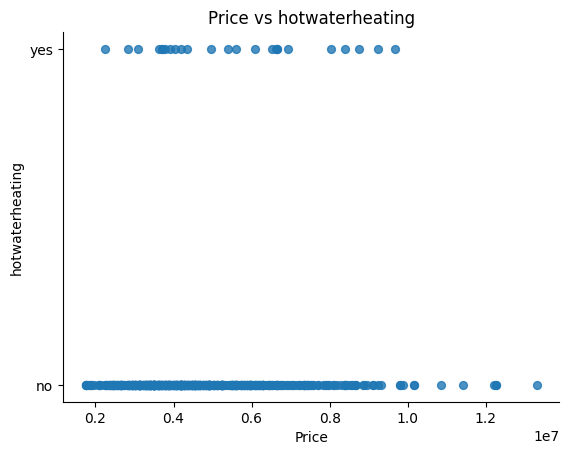

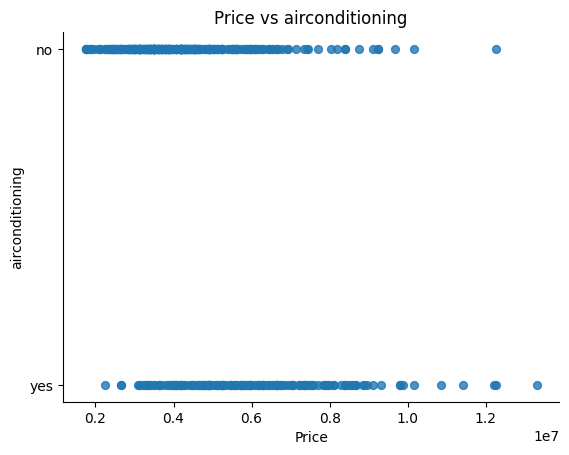

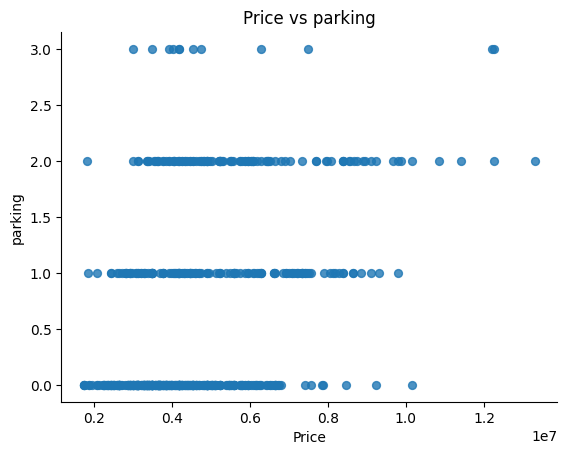

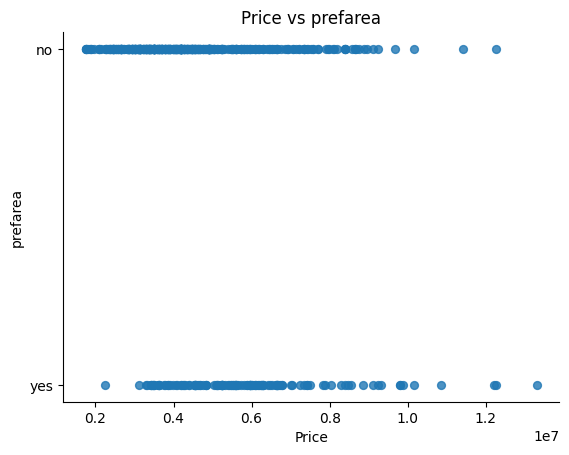

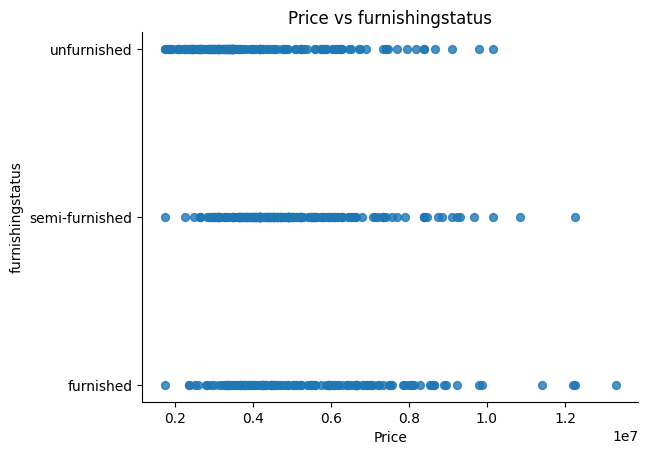

In [436]:
import matplotlib.pyplot as plt

# Assuming df_1 is the DataFrame you want to use for plotting
# Exclude 'price' column for plotting against all other features
features = df_1.columns.drop('price')

for feature in features:
    df_1.plot(kind='scatter', x='price', y=feature, s=32, alpha=.8)
    plt.title(f'Price vs {feature}')
    plt.xlabel('Price')
    plt.ylabel(feature)
    plt.gca().spines[['top', 'right',]].set_visible(False)
    plt.show()

In [437]:
#utility functions

def min(arr):
    min=arr[0]
    for i in arr:
        if i<min:
            min=i
    return min

def max(arr):
    max=arr[0]
    for i in arr:
        if i>max:
            max=i
    return max

def mean(arr):
    sum=0
    for i in arr:
        sum+=i
    return sum/len(arr)

def median(arr):
    arr.sort()
    if len(arr)%2==0:
        return (arr[len(arr)//2]+arr[len(arr)//2-1])/2
    else:
        return arr[len(arr)//2]

def std(arr):
    mean_value=mean(arr)
    sum=0
    for i in arr:
        sum+=(i-mean_value)**2
    return (sum/len(arr))**0.5


In [438]:
df_1=pd.read_csv('Housing.csv')
df_1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


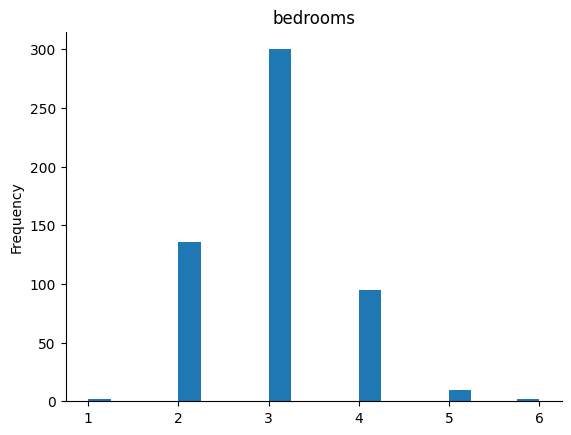

In [439]:
# @title bedrooms

from matplotlib import pyplot as plt
df_1['bedrooms'].plot(kind='hist', bins=20, title='bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

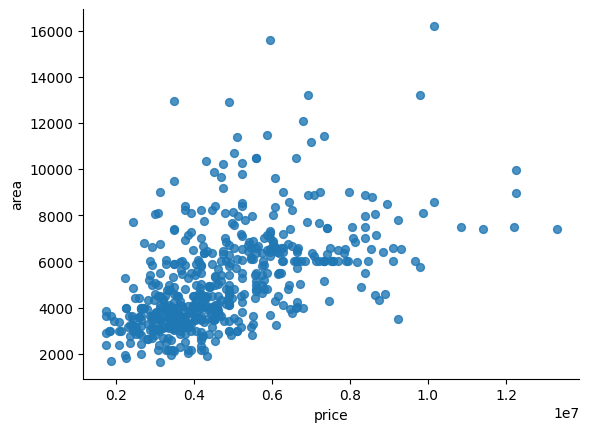

In [440]:
# @title price vs area

from matplotlib import pyplot as plt
df_1.plot(kind='scatter', x='price', y='area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Normalisation
1. Min Max Scaling
2. Standard Normalisation

In [441]:
# 1. Min Max Scaling


min_price=min(df_1['price'])
max_price=max(df_1['price'])

df_1['price']=(df_1['price']-min_price)/(max_price-min_price)


min_area=min(df_1['area'])
max_area=max(df_1['area'])

df_1['area']=(df_1['area']-min_area)/(max_area-min_area)

df_1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,0.909091,0.502405,4,4,4,yes,no,no,no,yes,3,no,furnished
2,0.909091,0.571134,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,0.906061,0.402062,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,0.836364,0.396564,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [442]:
# 2. Standard Scaling
df_2=pd.read_csv('Housing.csv')
mean_price=mean(df_2['price'])
std_price=std(df_2['price'])
mean_area=mean(df_2['area'])
std_area=std(df_2['area'])

df_2['price']=(df_2['price']-mean_price)/std_price
df_2['area']=(df_2['area']-mean_area)/std_area
df_2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,4.004484,1.757010,4,4,4,yes,no,no,no,yes,3,no,furnished
2,4.004484,2.218232,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,3.985755,1.083624,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,3.554979,1.046726,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [443]:
# df3 is one hot encoding with standard scaling
df_3=df_2.copy()
df_3.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,4.004484,1.757010,4,4,4,yes,no,no,no,yes,3,no,furnished
2,4.004484,2.218232,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,3.985755,1.083624,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,3.554979,1.046726,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [444]:
# label encoding for categorical columns

df_1['mainroad']=df_1['mainroad'].map({'yes':1,'no':0})
df_2['mainroad']=df_2['mainroad'].map({'yes':1,'no':0})
df_3['mainroad']=df_3['mainroad'].map({'yes':1,'no':0})

df_1['guestroom']=df_1['guestroom'].map({'yes':1,'no':0})
df_2['guestroom']=df_2['guestroom'].map({'yes':1,'no':0})
df_3['guestroom']=df_3['guestroom'].map({'yes':1,'no':0})

df_1['basement']=df_1['basement'].map({'yes':1,'no':0})
df_2['basement']=df_2['basement'].map({'yes':1,'no':0})
df_3['basement']=df_3['basement'].map({'yes':1,'no':0})

df_1['hotwaterheating']=df_1['hotwaterheating'].map({'yes':1,'no':0})
df_2['hotwaterheating']=df_2['hotwaterheating'].map({'yes':1,'no':0})
df_3['hotwaterheating']=df_3['hotwaterheating'].map({'yes':1,'no':0})

df_1['airconditioning']=df_1['airconditioning'].map({'yes':1,'no':0})
df_2['airconditioning']=df_2['airconditioning'].map({'yes':1,'no':0})
df_3['airconditioning']=df_3['airconditioning'].map({'yes':1,'no':0})

df_1['prefarea']=df_1['prefarea'].map({'yes':1,'no':0})
df_2['prefarea']=df_2['prefarea'].map({'yes':1,'no':0})
df_3['prefarea']=df_3['prefarea'].map({'yes':1,'no':0})




df_1['furnishingstatus']=df_1['furnishingstatus'].map({'furnished':2,'semi-furnished':1,'unfurnished':0})
df_2['furnishingstatus']=df_2['furnishingstatus'].map({'furnished':2,'semi-furnished':1,'unfurnished':0})

In [445]:
#one hot encoding for df3 only for furnishing status
df_3['furnished']=df_3['furnishingstatus'].map({'furnished':1,'semi-furnished':0,'unfurnished':0})
df_3['semi-furnished']=df_3['furnishingstatus'].map({'furnished':0,'semi-furnished':1,'unfurnished':0})
df_3['unfurnished']=df_3['furnishingstatus'].map({'furnished':0,'semi-furnished':0,'unfurnished':1})

In [446]:
df_3.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,4.566365,1.046726,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,4.004484,1.757010,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,4.004484,2.218232,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1,0
3,3.985755,1.083624,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,3.554979,1.046726,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0


1. df_1:min-max scaling with label encoding
2. df_2:standard scaling with label encoding
3. df_3: standard scaling with one hot encoding




In [447]:
df_3.drop(['furnishingstatus','unfurnished'],axis=1,inplace=True)

In [448]:
df_3.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
0,4.566365,1.046726,4,2,3,1,0,0,0,1,2,1,1,0
1,4.004484,1.757010,4,4,4,1,0,0,0,1,3,0,1,0
2,4.004484,2.218232,3,2,2,1,0,1,0,0,2,1,0,1
3,3.985755,1.083624,4,2,2,1,0,1,0,1,3,1,1,0
4,3.554979,1.046726,4,1,2,1,1,1,0,1,2,0,1,0


In [449]:
#x and y must be numpy array
def Linear_Regression(x,y,learning_rate,epochs):
  x=np.array(x)
  y=np.array(y)
  weights=np.zeros((1,x.shape[1]))
  bias=0
  learning_rate=learning_rate
  epochs=epochs
  for i in range(epochs):
    y_pred=abs(np.dot(weights,x.T)+bias)*10
    print(y.shape,y_pred.shape)
    loss=np.mean((y-y_pred)**2)
    dw=2*(y-y_pred).dot(x)
    db=2*(y-y_pred)
    weights=weights-learning_rate*dw
    bias=bias-learning_rate*db
    print(f"Loss:{loss},Epoch:{i}\n{'-'*50}\n")
  return weights,bias

In [450]:
x_1=df_1.drop('price',axis=1)
y_1=df_1['price']

x_2=df_2.drop('price',axis=1)
y_2=df_2['price']

x_3=df_3.drop('price',axis=1)
y_3=df_3['price']

In [451]:
# df_1 training

weights_1,bias_1=Linear_Regression(x_1,y_1,1e-8,100)

(545,) (1, 545)
Loss:0.09439688433384724,Epoch:0
--------------------------------------------------

(545,) (1, 545)
Loss:0.09410775472509873,Epoch:1
--------------------------------------------------

(545,) (1, 545)
Loss:0.09381970175222018,Epoch:2
--------------------------------------------------

(545,) (1, 545)
Loss:0.09353272139888533,Epoch:3
--------------------------------------------------

(545,) (1, 545)
Loss:0.0932468096637515,Epoch:4
--------------------------------------------------

(545,) (1, 545)
Loss:0.09296196256040341,Epoch:5
--------------------------------------------------

(545,) (1, 545)
Loss:0.09267817611729777,Epoch:6
--------------------------------------------------

(545,) (1, 545)
Loss:0.09239544637770762,Epoch:7
--------------------------------------------------

(545,) (1, 545)
Loss:0.0921137693996672,Epoch:8
--------------------------------------------------

(545,) (1, 545)
Loss:0.0918331412559167,Epoch:9
---------------------------------------------

In [452]:
# DF_2 training

weights_2,bias_2=Linear_Regression(x_2,y_2,1e-8,100)

(545,) (1, 545)
Loss:0.9999999999999981,Epoch:0
--------------------------------------------------

(545,) (1, 545)
Loss:0.99982170096626,Epoch:1
--------------------------------------------------

(545,) (1, 545)
Loss:0.9996437460012346,Epoch:2
--------------------------------------------------

(545,) (1, 545)
Loss:0.9994661338997355,Epoch:3
--------------------------------------------------

(545,) (1, 545)
Loss:0.9992888634610383,Epoch:4
--------------------------------------------------

(545,) (1, 545)
Loss:0.9991119334888662,Epoch:5
--------------------------------------------------

(545,) (1, 545)
Loss:0.9989353427913717,Epoch:6
--------------------------------------------------

(545,) (1, 545)
Loss:0.9987590901811205,Epoch:7
--------------------------------------------------

(545,) (1, 545)
Loss:0.9985831744750765,Epoch:8
--------------------------------------------------

(545,) (1, 545)
Loss:0.9984075944945832,Epoch:9
--------------------------------------------------

(5

In [453]:
weights_3,bias_3=Linear_Regression(x_3,y_3,1e-8,100)

(545,) (1, 545)
Loss:0.9999999999999981,Epoch:0
--------------------------------------------------

(545,) (1, 545)
Loss:0.999830998822486,Epoch:1
--------------------------------------------------

(545,) (1, 545)
Loss:0.999662296895153,Epoch:2
--------------------------------------------------

(545,) (1, 545)
Loss:0.9994938932193864,Epoch:3
--------------------------------------------------

(545,) (1, 545)
Loss:0.9993257868001237,Epoch:4
--------------------------------------------------

(545,) (1, 545)
Loss:0.9991579766458396,Epoch:5
--------------------------------------------------

(545,) (1, 545)
Loss:0.9989904617685327,Epoch:6
--------------------------------------------------

(545,) (1, 545)
Loss:0.9988232411837135,Epoch:7
--------------------------------------------------

(545,) (1, 545)
Loss:0.9986563139103922,Epoch:8
--------------------------------------------------

(545,) (1, 545)
Loss:0.9984896789710656,Epoch:9
--------------------------------------------------

(5

In [454]:
bias_1=np.mean(bias_1)
bias_2=np.mean(bias_2)
bias_3=np.mean(bias_3)
abs(np.dot(x_1,weights_1.T)+bias_1).shape
y_1=np.array(y_1)
y_2=np.array(y_2)
y_3=np.array(y_3)

bias_1.shape

()

In [455]:
# MSE

def MSE(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)

y_pred_1=abs(np.dot(x_1,weights_1.T)+bias_1)
y_pred_2=abs(np.dot(x_2,weights_2.T)+bias_2)
y_pred_3=abs(np.dot(x_3,weights_3.T)+bias_3)

MSE_1=MSE(y_1.T,y_pred_1)
MSE_2=MSE(y_2.T,y_pred_2)
MSE_3=MSE(y_3.T,y_pred_3)


print(MSE_1,MSE_2,MSE_3)

0.09201522725304681 1.0000072653281715 1.0000063690766032


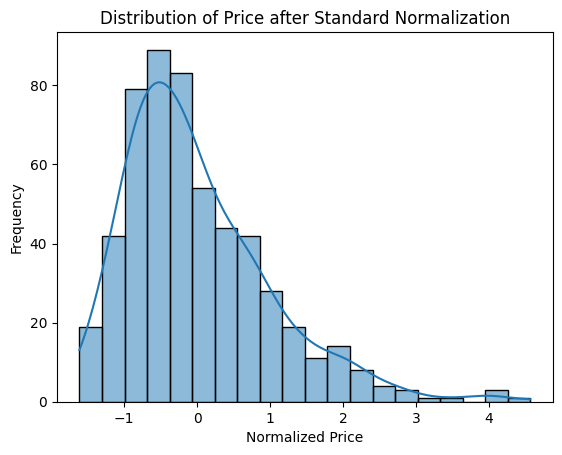

In [456]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_2['price'], bins=20, kde=True)
plt.title('Distribution of Price after Standard Normalization')
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.show()

In [457]:
z_scores_area=(df_2['area']-np.mean(df_2['area']))/std(df_2['area'])
z_scores_price=(df_2['price']-np.mean(df_2['price']))/std(df_2['price'])



# Task
Remove outliers from the 'area' and 'price' columns in the dataframe `df_2` using the z-score method with a threshold of 3, and then plot the 'price' vs 'area' scatter plot of the cleaned data.

## Calculate z-scores

### Subtask:
Compute the z-scores for the 'area' and 'price' columns in `df_2`.


**Reasoning**:
Calculate the z-scores for 'area' and 'price' columns in df_2 and store them in new columns.



In [458]:
mean_area = df_2['area'].mean()
std_area = df_2['area'].std()
mean_price = df_2['price'].mean()
std_price = df_2['price'].std()

df_2['area_zscore'] = (df_2['area'] - mean_area) / std_area
df_2['price_zscore'] = (df_2['price'] - mean_price) / std_price

display(df_2.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_zscore,price_zscore
0,4.566365,1.046726,4,2,3,1,0,0,0,1,2,1,2,1.045766,4.562174
1,4.004484,1.757010,4,4,4,1,0,0,0,1,3,0,2,1.755397,4.000809
2,4.004484,2.218232,3,2,2,1,0,1,0,0,2,1,1,2.216196,4.000809
3,3.985755,1.083624,4,2,2,1,0,1,0,1,3,1,2,1.082630,3.982096
4,3.554979,1.046726,4,1,2,1,1,1,0,1,2,0,2,1.045766,3.551716


## Identify outliers

### Subtask:
Define a threshold for z-scores and identify rows where the absolute z-score for either 'area' or 'price' exceeds this threshold.


**Reasoning**:
Define the z-score threshold, create boolean masks for outliers in 'area' and 'price' based on the threshold, combine these masks, and then display the rows from df_2 that are identified as outliers.



In [459]:
z_score_threshold = 3
area_outliers_mask = np.abs(df_2['area_zscore']) > z_score_threshold
price_outliers_mask = np.abs(df_2['price_zscore']) > z_score_threshold
combined_outliers_mask = area_outliers_mask | price_outliers_mask
outliers = df_2[combined_outliers_mask]
display(outliers)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_zscore,price_zscore
0,4.566365,1.046726,4,2,3,1,0,0,0,1,2,1,2,1.045766,4.562174
1,4.004484,1.757010,4,4,4,1,0,0,0,1,3,0,2,1.755397,4.000809
2,4.004484,2.218232,3,2,2,1,0,1,0,0,2,1,1,2.216196,4.000809
3,3.985755,1.083624,4,2,2,1,0,1,0,1,3,1,2,1.082630,3.982096
4,3.554979,1.046726,4,1,2,1,1,1,0,1,2,0,2,1.045766,3.551716
5,3.255309,1.083624,3,3,1,1,0,1,0,1,2,1,1,1.082630,3.252321
7,2.880722,5.096263,5,3,2,1,0,0,0,0,0,0,0,5.091586,2.878078
10,2.693428,3.712595,3,1,2,1,0,1,0,1,2,1,2,3.709187,2.690956
66,1.157620,3.712595,2,1,1,1,0,1,1,0,1,0,2,3.709187,1.156557
69,1.082702,3.200637,4,2,2,1,0,0,0,0,2,1,2,3.197699,1.081709


## Remove outliers

### Subtask:
Create a new DataFrame by removing the identified outlier rows from `df_2`.


**Reasoning**:
Create a new DataFrame by removing the identified outlier rows from df_2, and then display the head of the cleaned dataframe and the number of rows in both dataframes.



In [460]:
df_cleaned = df_2[~combined_outliers_mask].copy()
display(df_cleaned.head())
print(f"Original DataFrame rows: {df_2.shape[0]}")
print(f"Cleaned DataFrame rows: {df_cleaned.shape[0]}")

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_zscore,price_zscore
6,2.880722,1.581745,4,3,4,1,0,0,0,1,2,1,1,1.580293,2.878078
8,2.730887,1.360358,4,1,2,1,1,1,0,1,2,1,2,1.359109,2.728380
9,2.693428,0.276484,3,2,4,1,1,0,0,1,1,1,0,0.276230,2.690956
11,2.629748,0.391790,4,3,2,1,1,1,1,0,2,0,1,0.391430,2.627335
12,2.431217,0.645462,4,2,2,1,0,0,0,1,1,1,1,0.644870,2.428986


Original DataFrame rows: 545
Cleaned DataFrame rows: 532


## Visualize data without outliers

### Subtask:
Plot the 'price' vs 'area' scatter plot using the new DataFrame to visualize the data after outlier removal.


**Reasoning**:
Create a scatter plot of 'price' vs 'area' using the cleaned data and add titles and labels.



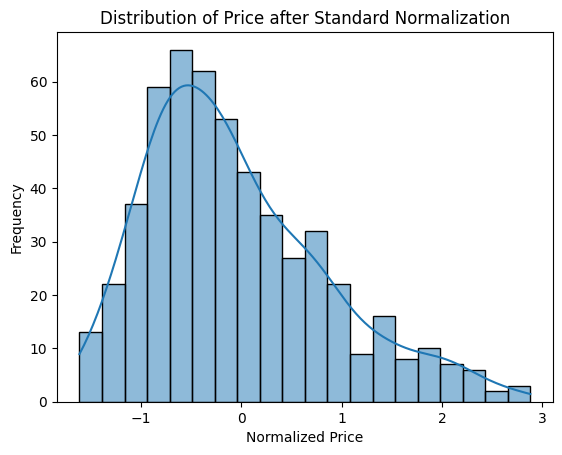

In [461]:

sns.histplot(df_cleaned['price'], bins=20, kde=True)
plt.title('Distribution of Price after Standard Normalization')
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The z-scores for the 'area' and 'price' columns were calculated and added to the dataframe `df_2`.
*   Using a z-score threshold of 3, 13 rows were identified as outliers in either the 'area' or 'price' columns.
*   A new dataframe, `df_cleaned`, was created by removing these 13 outlier rows, resulting in 532 rows compared to the original 545 rows.
*   A scatter plot of 'price' versus 'area' was generated using the cleaned data, visualizing the relationship after outlier removal.

### Insights or Next Steps

*   The z-score method with a threshold of 3 effectively removed data points significantly deviating from the mean in 'area' and 'price'.
*   Further analysis can now be performed on the cleaned dataset without the influence of extreme values, potentially leading to more robust model training or statistical analysis.


In [462]:
x_cleaned=df_cleaned.drop('price',axis=1)
y_cleaned=df_cleaned['price']

w_cleaned,b_cleaned=Linear_Regression(x_cleaned,y_cleaned,1e-8,100)

(532,) (1, 532)
Loss:0.8158442462532055,Epoch:0
--------------------------------------------------

(532,) (1, 532)
Loss:0.8156638311838844,Epoch:1
--------------------------------------------------

(532,) (1, 532)
Loss:0.8154838147577084,Epoch:2
--------------------------------------------------

(532,) (1, 532)
Loss:0.8153041980890394,Epoch:3
--------------------------------------------------

(532,) (1, 532)
Loss:0.8151249803949783,Epoch:4
--------------------------------------------------

(532,) (1, 532)
Loss:0.8149461608277437,Epoch:5
--------------------------------------------------

(532,) (1, 532)
Loss:0.8147677387572636,Epoch:6
--------------------------------------------------

(532,) (1, 532)
Loss:0.8145897135548645,Epoch:7
--------------------------------------------------

(532,) (1, 532)
Loss:0.8144120879151643,Epoch:8
--------------------------------------------------

(532,) (1, 532)
Loss:0.8142348590368387,Epoch:9
--------------------------------------------------



In [463]:
y_cleaned=np.array(y_cleaned)
b_cleaned=np.mean(b_cleaned)

In [464]:
# MSE

def MSE(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)

y_pred_1=abs(np.dot(x_1,weights_1.T)+bias_1)
y_pred_2=abs(np.dot(x_2,weights_2.T)+bias_2)
y_pred_3=abs(np.dot(x_3,weights_3.T)+bias_3)
y_pred_cleaned=abs(np.dot(x_cleaned,w_cleaned.T)+b_cleaned)

MSE_1=MSE(y_1.T,y_pred_1)
MSE_2=MSE(y_2.T,y_pred_2)
MSE_3=MSE(y_3.T,y_pred_3)
MSE_cleaned=MSE(y_cleaned.T,y_pred_cleaned)


print(MSE_1,MSE_2,MSE_3,MSE_cleaned)

0.09201522725304681 1.0000072653281715 1.0000063690766032 0.8160230420047025


# Task
Remove outliers from `df_1` using z-score, apply linear regression, calculate the MSE, and compare it with the MSE of linear regression applied to `df_1`, `df_2`, and `df_3`.

## Calculate z-scores for df 1

### Subtask:
Compute the z-scores for the 'area' and 'price' columns in `df_1`.


**Reasoning**:
Calculate the mean and standard deviation for 'area' and 'price' in df_1 and then compute and store the z-scores for these columns.



In [465]:
mean_area_df1 = df_1['area'].mean()
std_area_df1 = df_1['area'].std()
mean_price_df1 = df_1['price'].mean()
std_price_df1 = df_1['price'].std()

df_1['area_zscore'] = (df_1['area'] - mean_area_df1) / std_area_df1
df_1['price_zscore'] = (df_1['price'] - mean_price_df1) / std_price_df1

display(df_1.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_zscore,price_zscore
0,1.000000,0.396564,4,2,3,1,0,0,0,1,2,1,2,1.045766,4.562174
1,0.909091,0.502405,4,4,4,1,0,0,0,1,3,0,2,1.755397,4.000809
2,0.909091,0.571134,3,2,2,1,0,1,0,0,2,1,1,2.216196,4.000809
3,0.906061,0.402062,4,2,2,1,0,1,0,1,3,1,2,1.082630,3.982096
4,0.836364,0.396564,4,1,2,1,1,1,0,1,2,0,2,1.045766,3.551716


## Identify outliers in df 1

### Subtask:
Define a threshold for z-scores and identify rows in `df_1` where the absolute z-score for either 'area' or 'price' exceeds this threshold.


**Reasoning**:
Define the z-score threshold, create boolean masks for outliers in 'area' and 'price' based on the threshold, combine these masks, and then display the rows from df_1 that are identified as outliers.



In [466]:
z_score_threshold = 3
area_outliers_mask_df1 = np.abs(df_1['area_zscore']) > z_score_threshold
price_outliers_mask_df1 = np.abs(df_1['price_zscore']) > z_score_threshold
combined_outliers_mask_df1 = area_outliers_mask_df1 | price_outliers_mask_df1
outliers_df1 = df_1[combined_outliers_mask_df1]
display(outliers_df1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_zscore,price_zscore
0,1.000000,0.396564,4,2,3,1,0,0,0,1,2,1,2,1.045766,4.562174
1,0.909091,0.502405,4,4,4,1,0,0,0,1,3,0,2,1.755397,4.000809
2,0.909091,0.571134,3,2,2,1,0,1,0,0,2,1,1,2.216196,4.000809
3,0.906061,0.402062,4,2,2,1,0,1,0,1,3,1,2,1.082630,3.982096
4,0.836364,0.396564,4,1,2,1,1,1,0,1,2,0,2,1.045766,3.551716
5,0.787879,0.402062,3,3,1,1,0,1,0,1,2,1,1,1.082630,3.252321
7,0.727273,1.000000,5,3,2,1,0,0,0,0,0,0,0,5.091586,2.878078
10,0.696970,0.793814,3,1,2,1,0,1,0,1,2,1,2,3.709187,2.690956
66,0.448485,0.793814,2,1,1,1,0,1,1,0,1,0,2,3.709187,1.156557
69,0.436364,0.717526,4,2,2,1,0,0,0,0,2,1,2,3.197699,1.081709


## Remove outliers from df 1

### Subtask:
Create a new DataFrame by removing the identified outlier rows from `df_1`.


**Reasoning**:
Create a new DataFrame by removing the identified outlier rows from df_1, and then display the head of the cleaned dataframe and the number of rows in both dataframes.



In [467]:
df_cleaned_df1 = df_1[~combined_outliers_mask_df1].copy()
display(df_cleaned_df1.head())
print(f"Original DataFrame rows: {df_1.shape[0]}")
print(f"Cleaned DataFrame rows: {df_cleaned_df1.shape[0]}")

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_zscore,price_zscore
6,0.727273,0.476289,4,3,4,1,0,0,0,1,2,1,1,1.580293,2.878078
8,0.703030,0.443299,4,1,2,1,1,1,0,1,2,1,2,1.359109,2.728380
9,0.696970,0.281787,3,2,4,1,1,0,0,1,1,1,0,0.276230,2.690956
11,0.686667,0.298969,4,3,2,1,1,1,1,0,2,0,1,0.391430,2.627335
12,0.654545,0.336770,4,2,2,1,0,0,0,1,1,1,1,0.644870,2.428986


Original DataFrame rows: 545
Cleaned DataFrame rows: 532


## Apply linear regression on cleaned df 1

### Subtask:
Train a linear regression model on the cleaned `df_1` data.


**Reasoning**:
Define the features (x) and target (y) variables from the df_cleaned_df1 DataFrame and train a linear regression model using the Linear_Regression function.



In [468]:
x_cleaned_df1 = df_cleaned_df1.drop('price', axis=1)
y_cleaned_df1 = df_cleaned_df1['price']

weights_cleaned_df1, bias_cleaned_df1 = Linear_Regression(x_cleaned_df1, y_cleaned_df1, 1e-8, 100)

(532,) (1, 532)
Loss:0.08461810938599944,Epoch:0
--------------------------------------------------

(532,) (1, 532)
Loss:0.08435975668183315,Epoch:1
--------------------------------------------------

(532,) (1, 532)
Loss:0.08410232335198824,Epoch:2
--------------------------------------------------

(532,) (1, 532)
Loss:0.08384580609306953,Epoch:3
--------------------------------------------------

(532,) (1, 532)
Loss:0.08359020161356036,Epoch:4
--------------------------------------------------

(532,) (1, 532)
Loss:0.08333550663377971,Epoch:5
--------------------------------------------------

(532,) (1, 532)
Loss:0.0830817178858399,Epoch:6
--------------------------------------------------

(532,) (1, 532)
Loss:0.08282883211360391,Epoch:7
--------------------------------------------------

(532,) (1, 532)
Loss:0.08257684607264325,Epoch:8
--------------------------------------------------

(532,) (1, 532)
Loss:0.08232575653019587,Epoch:9
-------------------------------------------

## Calculate mse for cleaned df 1

### Subtask:
Compute the Mean Squared Error for the linear regression model trained on the cleaned `df_1` data.


**Reasoning**:
Compute the Mean Squared Error for the linear regression model trained on the cleaned df_1 data.



In [469]:
y_cleaned_df1 = np.array(y_cleaned_df1)
bias_cleaned_df1 = np.mean(bias_cleaned_df1)

In [470]:
# MSE

def MSE(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)

y_pred_1=abs(np.dot(x_1,weights_1.T)+bias_1)*100
y_pred_2=abs(np.dot(x_2,weights_2.T)+bias_2)*100
y_pred_3=abs(np.dot(x_3,weights_3.T)+bias_3)*100
y_pred_cleaned=abs(np.dot(x_cleaned,w_cleaned.T)+b_cleaned)*100
y_pred_cleaned_df1=abs(np.dot(x_cleaned_df1,weights_cleaned_df1.T)+bias_cleaned_df1)*100

MSE_1=MSE(y_1.T,y_pred_1)
MSE_2=MSE(y_2.T,y_pred_2)
MSE_3=MSE(y_3.T,y_pred_3)
MSE_cleaned=MSE(y_cleaned.T,y_pred_cleaned)
MSE_cleaned_df1=MSE(y_cleaned_df1.T,y_pred_cleaned_df1)


print(MSE_1,MSE_2,MSE_3,MSE_cleaned,MSE_cleaned_df1)

0.07874906508196906 1.072653281736579 1.0636907660518398 0.8721448062467722 0.06396774076129041


In [471]:

# Print some predictions
print("Sample Predictions from the best performing model:")
for i in range(10):
    print(f"Actual: {y_cleaned_df1[i]:.2f}, Predicted: {y_pred_cleaned_df1[i][0]:.2f}")

Sample Predictions from the best performing model:
Actual: 0.73, Predicted: 0.76
Actual: 0.70, Predicted: 0.63
Actual: 0.70, Predicted: 0.60
Actual: 0.69, Predicted: 0.65
Actual: 0.65, Predicted: 0.59
Actual: 0.65, Predicted: 0.61
Actual: 0.65, Predicted: 0.49
Actual: 0.64, Predicted: 0.57
Actual: 0.64, Predicted: 0.58
Actual: 0.62, Predicted: 0.66


## Results Summary

Here's a summary of the preprocessing techniques applied to each dataframe and the corresponding Mean Squared Error (MSE) values from the linear regression models:

| DataFrame      | Preprocessing Technique                     | MSE         |
|----------------|---------------------------------------------|-------------|
| **df_1**       | Min-Max scaling with label encoding         | 0.0787  |
| **df_2**       | Standard scaling with label encoding        | 1.0727  |
| **df_3**       | Standard scaling with one-hot encoding      | 1.0637  |
| **df_cleaned** | Standard scaling, label encoding, outlier removal (from df_2) | 0.8721 |
| **df_cleaned_df1** | Min-Max scaling, label encoding, outlier removal (from df_1) | 0.0640 |

Based on the MSE values, the model trained on `df_cleaned_df1` (Min-Max scaling with label encoding and outlier removal) performed the best.